# Imports 


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


K.set_image_data_format('channels_first')

seed = 7
np.random.seed(seed)

In [ ]:
def get_data_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

    X_train /= 255.0
    X_test /= 255.0

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes

In [ ]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

def small_model(num_classes):
    model = Sequential()


    model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu'))


    model.add(Conv2D(32, (3, 3), activation='relu'))

    model.add(Flatten())

    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [ ]:
model = small_model(num_classes = 10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 26, 26)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 24, 24)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 7s 10ms/step - loss: 0.2281 - accuracy: 0.9348 - val_loss: 0.0754 - val_accuracy: 0.9766
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0671 - accuracy: 0.9804 - val_loss: 0.0546 - val_accuracy: 0.9829
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0459 - val_accuracy: 0.9842
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0406 - val_accuracy: 0.9875
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0407 - val_accuracy: 0.9868
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.0465 - val_accuracy: 0.9850
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0462 - val_accuracy: 0.9872
Epoc

In [ ]:
def print_model_error_rate(model, X_test, y_test):
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score : %.2f%%" % (scores[1] * 100))
    print("Model error rate : %.2f%%" % (100 - scores[1] * 100))

In [ ]:
print_model_error_rate(model, X_test, y_test)

Model score : 98.57%
Model error rate : 1.43%


In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

def load_and_prepare_image(filepath):
    img = load_img(filepath, color_mode='grayscale', target_size=(28, 28))

    img_array = img_to_array(img)

    img_array /= 255.0


    img_array = np.expand_dims(img_array, axis=0)

    return img_array

def predict_image(model, img_array):
    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction, axis=1)

    return predicted_class


image_path = '/content/test_image.jpeg'
#image_path = '/content/paint_test1.png'

img_array = load_and_prepare_image(image_path)


predicted_class = predict_image(model, img_array)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 18ms/step
Predicted class: [3]


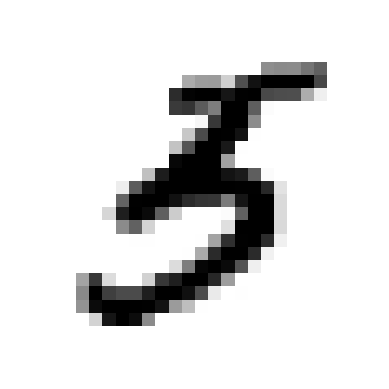

1/1 [==============================] - 0s 29ms/step
Predicted class: [3]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

def load_and_visualize_image(filepath):
    img = load_img(filepath, color_mode='grayscale', target_size=(28, 28))

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    img_array = img_to_array(img)

    img_array /= 255.0

    img_array = np.expand_dims(img_array, axis=0)

    return img_array

def predict_image(model, img_array):
    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction, axis=1)

    return predicted_class


image_path = '/content/test_image.jpeg'

img_array = load_and_visualize_image(image_path)

# Prédire l'image
predicted_class = predict_image(model, img_array)
print("Predicted class:", predicted_class)


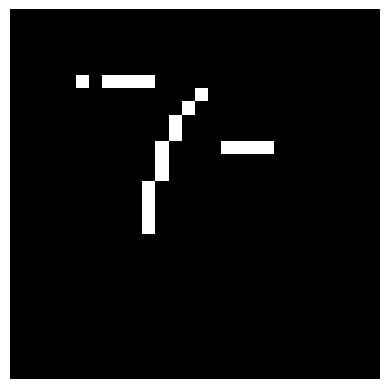

1/1 [==============================] - 0s 25ms/step
Predicted class: [7]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

def load_and_visualize_image(filepath):
    img = load_img(filepath, color_mode='grayscale', target_size=(28, 28))

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    img_array = img_to_array(img)

    img_array /= 255.0

    img_array = np.expand_dims(img_array, axis=0)

    return img_array

def predict_image(model, img_array):
    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction, axis=1)

    return predicted_class


image_path = '/content/paint_test7.png'

img_array = load_and_visualize_image(image_path)

predicted_class = predict_image(model, img_array)
print("Predicted class:", predicted_class)